In [1]:
import pandas as pd

# Load data

In [43]:
df = pd.read_csv("/kaggle/input/titaniccsv/titanic.csv")

In [44]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [46]:
# Count missing values in each column
print(df.isnull().sum())

PassengerId    0
Survived       0
dtype: int64


In [47]:
# Summary of numerical columns
print(df.describe())

       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.366029
std     120.810458    0.482295
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


In [48]:
print(df['Survived'].value_counts())

Survived
0    265
1    153
Name: count, dtype: int64


In [49]:
print(df['PassengerId'].value_counts())

PassengerId
892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: count, Length: 418, dtype: int64


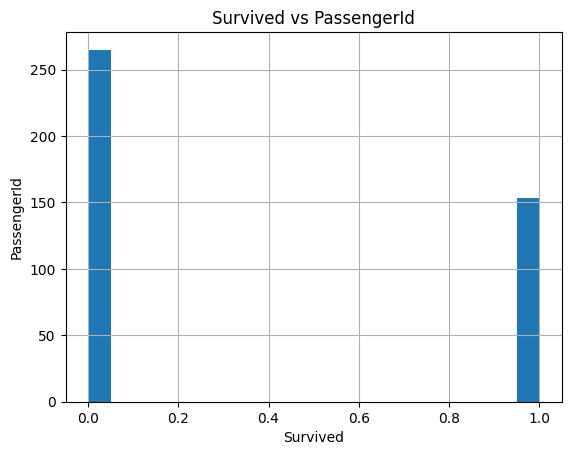

In [50]:
import matplotlib.pyplot as plt
df['Survived'].hist(bins=20)
plt.title('Survived vs PassengerId')
plt.xlabel('Survived')
plt.ylabel('PassengerId')
plt.show()

In [51]:
print(df.corr())

             PassengerId  Survived
PassengerId      1.00000  -0.05015
Survived        -0.05015   1.00000


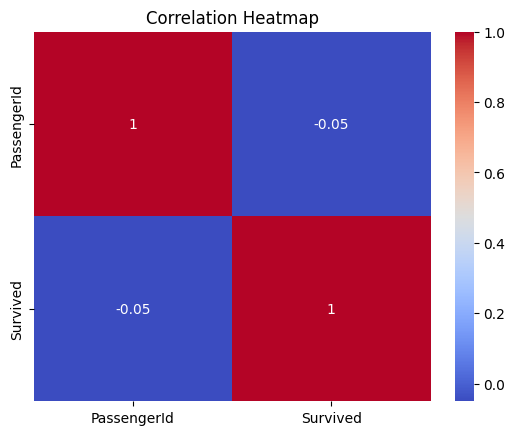

In [52]:
import seaborn as sns

# Heatmap of correlation matrix
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [53]:
X=df['Survived']
Y=df['PassengerId']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Convert to numpy arrays and reshape if necessary
if len(X_train.shape) == 1:
    X_train = X_train.to_numpy().reshape(-1, 1)
if len(X_test.shape) == 1:
    X_test = X_test.to_numpy().reshape(-1, 1)

# Apply MinMaxScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [57]:
# Predict on the test set
Y_pred = classifier.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate classification performance
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred, zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Accuracy: 0.00

Classification Report:
               precision    recall  f1-score   support

         892       0.00      0.00      0.00       1.0
         901       0.00      0.00      0.00       1.0
         907       0.00      0.00      0.00       1.0
         909       0.00      0.00      0.00       1.0
         911       0.00      0.00      0.00       1.0
         914       0.00      0.00      0.00       1.0
         916       0.00      0.00      0.00       1.0
         917       0.00      0.00      0.00       1.0
         922       0.00      0.00      0.00       1.0
         925       0.00      0.00      0.00       1.0
         931       0.00      0.00      0.00       1.0
         934       0.00      0.00      0.00       1.0
         938       0.00      0.00      0.00       1.0
         947       0.00      0.00      0.00       1.0
         948       0.00      0.00      0.00       1.0
         949       0.00      0.00      0.00       1.0
         958       0.00      0.00      0.

In [59]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [60]:
# Predict on the test set
Y_pred = regressor.predict(X_test)

In [61]:
# Evaluate regression performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [62]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 19035.45
R-squared: 0.01


In [63]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - R-squared: {r2_rf:.2f}")

Random Forest - Mean Squared Error: 19026.51
Random Forest - R-squared: 0.01


In [64]:
from sklearn.preprocessing import MinMaxScaler

# Scale Y
scaler_y = MinMaxScaler()
Y_train_scaled = scaler_y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_y.transform(Y_test.values.reshape(-1, 1))

# Train Linear Regression on scaled targets
regressor.fit(X_train, Y_train_scaled)

# Predict
Y_pred_scaled = regressor.predict(X_test)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)  # Inverse scaling

# Evaluate
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 19035.45
R-squared: 0.01


In [65]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, Y_train)

Y_pred_ridge = ridge_regressor.predict(X_test)

# Evaluate Ridge
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)

print(f"Ridge Regression - Mean Squared Error: {mse_ridge:.2f}")
print(f"Ridge Regression - R-squared: {r2_ridge:.2f}")

Ridge Regression - Mean Squared Error: 19036.50
Ridge Regression - R-squared: 0.01


In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
mse_cv = -scores.mean()
print(f"Cross-validated Mean Squared Error: {mse_cv:.2f}")

Cross-validated Mean Squared Error: 13484.11


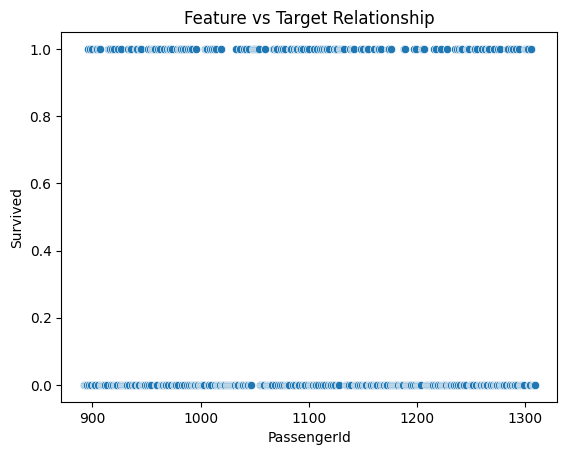

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df['PassengerId'], y=df['Survived'])
plt.title('Feature vs Target Relationship')
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam

In [69]:
# Build the model using embeddings for the categorical feature (PassengerId)
model = Sequential()

In [70]:
# Add embedding layer. Here, we use 10 as the dimension for embedding.
# The input_dim is the number of unique PassengerIds, and output_dim is the size of the embedding vector.
model.add(Input(shape=(1,)))  # One input feature (PassengerId)
model.add(Embedding(input_dim=len(df['PassengerId'].unique()) + 1, output_dim=10, input_length=1))
model.add(Flatten())  # Flatten the embedding output to a 1D vector
model.add(Dense(64, activation='relu'))  # Dense layer for additional learning
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [71]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0000e+00 - loss: -51.7992 - val_accuracy: 0.0000e+00 - val_loss: -181.8231
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -227.0342 - val_accuracy: 0.0000e+00 - val_loss: -399.1443
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -457.0591 - val_accuracy: 0.0000e+00 - val_loss: -705.7028
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -779.7066 - val_accuracy: 0.0000e+00 - val_loss: -1143.2061
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -1257.7556 - val_accuracy: 0.0000e+00 - val_loss: -1770.3228
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -1918.6951 - val_accuracy: 0.0000e+00 - val_loss: -2671.7693
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -2903.1523 - val_accuracy: 0.0000e+00 - val_loss: -3943.3315
Epoch 8/10
11

In [73]:
# Make predictions
Y_pred = model.predict(X_test).flatten()  # Get predictions

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [74]:
# Evaluate the model using MSE and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [75]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1229683.32
R-squared: -63.27


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [77]:
# Majority class prediction
majority_class = df['Survived'].value_counts().idxmax()
baseline_predictions = [majority_class] * len(df)

# Calculate accuracy and classification report
accuracy = accuracy_score(df['Survived'], baseline_predictions)
report = classification_report(df['Survived'], baseline_predictions, zero_division=0)

print(f'Baseline Model Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(report)

Baseline Model Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       265
           1       0.00      0.00      0.00       153

    accuracy                           0.63       418
   macro avg       0.32      0.50      0.39       418
weighted avg       0.40      0.63      0.49       418

